# Odpor vzduchu
Je dán vztahem:

$$
F_{o} = -\frac{1}{2} \rho S C_{d}(Re) v^{2} \frac{\vec{v}}{v} 
$$
Kde S představuje průřez tělesa, $\rho$ hustotu prostředí $v$ relativní rychlost,$C_{d}$ koeficient odporu. Koeficient závisí na Reynoldsově čísle, které je úměrné:

$$
Re = \frac{v L \rho}{\mu}
$$
Kde $L$ je charakteristická rozměr tělesa - něco jako průřez do směru pohybu, $\rho$ hustota prostředí, $\mu$ viskozita - míra toho, jak moc se prostředí brání pohybu.


Při laminárním proudění ($Re<10^{3}$) -> $C_d = \frac{1}{v}$) - Stoeks
Při turbulentním proudění
($10^{5}<Re<10^{5}$) -> $C_d = konst$ - Newton
Při odporu vzduchu pozorujeme  terminální ryclost, což je maximální rychlost, které při pádu dosáhneme - v důsledku odporu vzduchu.
Charakteristický rozměr v kontextu(=rozměr který stojí proti obtékání) Reynoldsova čísla na příkladech:\
U koule = průměr
\
U tyče = průměr tyče
\
U člověka = jeho výška 
\
U křídla = jeho délka 


# Impuls síly
Udává, míru změny síly v závislosti na čase:
$$
I = F \Delta t
$$
Pokud síla není konstantní, pak platí:
$$
I = \int_{t_{1}}^{t_{2}} F dt
$$
Nejčastěji při nárazu/velmi ve velmi krátkých časových intervalech. Jako $\Delta t $ se často doplňuje rychlost ššíření vzhruchu materiálem. 

dostĹ™el bez odporu vzduchu:  2294 m
dostĹ™el s odporem vzduchu :   222 m
-------------------------------------------
maximĂˇlnĂ­ vĂ˝Ĺˇka bez odporu vzduchu:   573 m
maximĂˇlnĂ­ vĂ˝Ĺˇka s odporem vzduchu :   106 m
-------------------------------------------
doba letu bez odporu vzduchu: 21.624 s
doba letu s odporem vzduchu : 9.112 s
-------------------------------------------


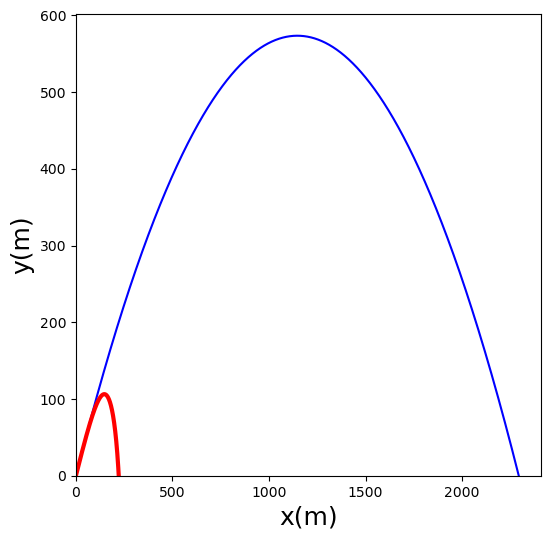

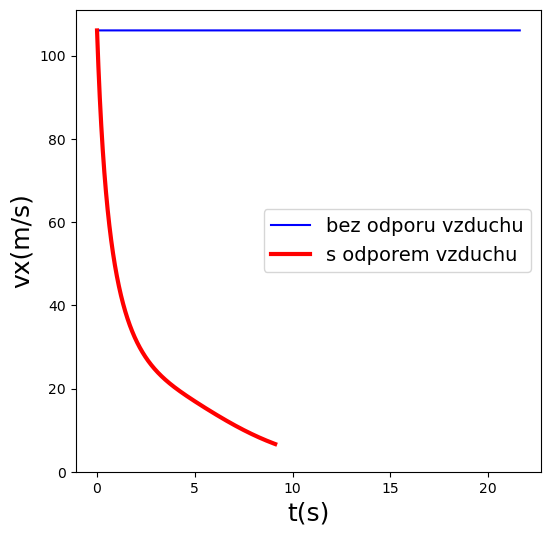

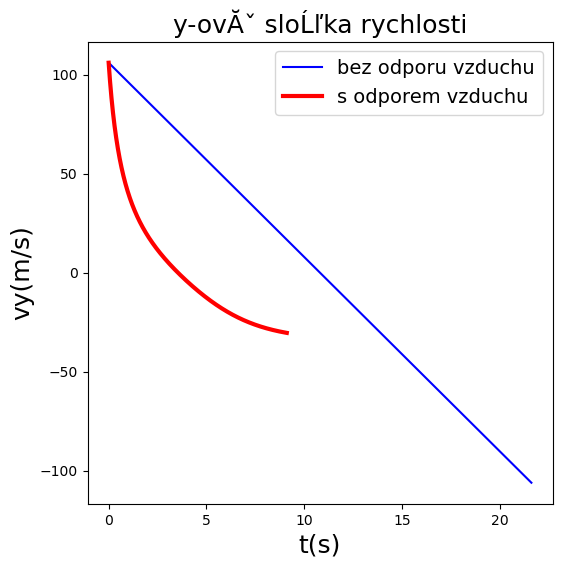

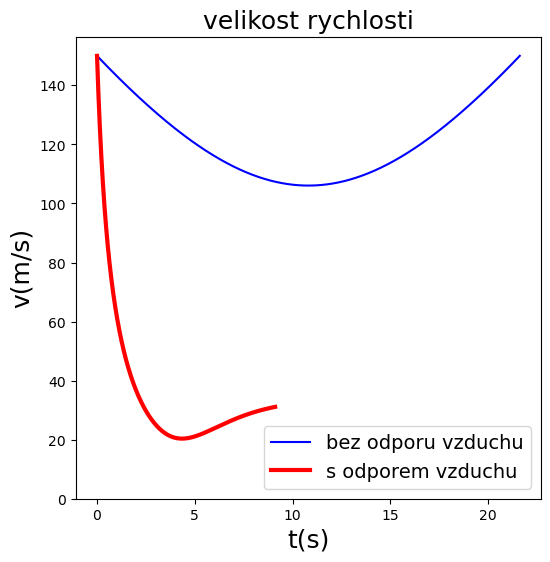

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def Fo(v,rho,Cd,S):
    return 0.5*rho*Cd*S*v**2

vFo=np.vectorize(Fo)

Cd=0.5 #koule
rho=1.29 #hustota vzduchu 1 kg/m^3


d=0.005 #Charakteristický rozměr projektilu 5 mm

S=np.pi*(d/2)**2 #prurez projektilu
rho_strela=11340 # 7874 kg/m3 hustota projektilu (Pd)
m=4/3*np.pi*(d/2)**3*rho_strela # hmotnost strely (kg)
g=9.81 #gravitacni zrychleni (m/s^2)
v0=150 #pocatecni rychlost strely 150 m/s
alfa=45*np.pi/180 #uhel vystrelu 30 stupnu
mu=2e-5 #viskozita vzduchu 2e-5 Pas

def Re(rho,d,v0,mu):
    
    return(rho*d*v0/mu)

Re = Re(rho,d,v0,mu)
tmax=50 #max. cas (s)
dt=1e-4 #casovy krok (s)
t=np.arange(0,tmax,dt) #pole casu
n=np.size(t) #pocet prvku pole

#bez odporu vzduchu
xb=np.empty(n) #pole x-ovych souradnic bez odporu vzduchu
yb=np.empty(n) #pole y-ovych souradnic bez odporu vzduchu
vxb=np.empty(n) #pole x-ovych slozek rychlosti bez odporu vzduchu
vyb=np.empty(n) #pole y-ovych slozek rychlosti bez odporu vzduchu
vb=np.empty(n) #pole velikosti rychlosti bez odporu vzduchu
#pocatecni podminky
xb[0]=0
yb[0]=0
vxb[0]=v0*np.cos(alfa)
vyb[0]=v0*np.sin(alfa)-g*dt/2
vb[0]=np.sqrt(vxb[0]**2+vyb[0]**2)
#numericke reseni pohybove rovnice
i=0
istop=0
imaxb=n
ymaxb=0
while istop==0 and i<n-1:
    i+=1
    xb[i]=xb[i-1]+vxb[i-1]*dt
    yb[i]=yb[i-1]+vyb[i-1]*dt
    if yb[i]<0:
        istop=1
        imaxb=i
    if yb[i]>ymaxb:
        ymaxb=yb[i]
    vxb[i]=vxb[i-1]
    vyb[i]=vyb[i-1]-g*dt
    vb[i]=np.sqrt(vxb[i]**2+vyb[i]**2)


#realna balisticka krivka
xr=np.empty(n) #pole x-ovych souradnic balisticka krivka
yr=np.empty(n) #pole y-ovych souradnic balisticka krivka
vxr=np.empty(n) #pole x-ovych slozek rychlosti balisticka krivka
vyr=np.empty(n) #pole y-ovych slozek rychlosti balisticka krivka
vr=np.empty(n) #pole velikosti rychlosti balisticka krivka
#pocatecni podminky
xr[0]=0
yr[0]=0
vxr[0]=v0*np.cos(alfa)-Fo(v0,rho,Cd,S)/m*np.cos(alfa)*dt/2
vyr[0]=v0*np.sin(alfa)-g*dt/2-Fo(v0,rho,Cd,S)/m*np.sin(alfa)*dt/2
vr[0]=np.sqrt(vxr[0]**2+vyr[0]**2)
#numericke reseni pohybove rovnice
i=0
istop=0
imaxr=n
ymaxr=0
while istop==0 and i<n-1:
    i+=1
    xr[i]=xr[i-1]+vxr[i-1]*dt
    yr[i]=yr[i-1]+vyr[i-1]*dt
    if yr[i]<0:
        istop=1
        imaxr=i
    if yr[i]>ymaxr:
        ymaxr=yr[i]
    vr[i]=np.sqrt(vxr[i-1]**2+vyr[i-1]**2)
    vxr[i]=vxr[i-1]-Fo(vr[i],rho,Cd,S)/m*vxr[i-1]/vr[i]*dt
    vyr[i]=vyr[i-1]-g*dt-Fo(vr[i],rho,Cd,S)/m*vyr[i-1]/vr[i]*dt

print('dostĹ™el bez odporu vzduchu: {0:5.0f} m'.format(xb[imaxb]))
print('dostĹ™el s odporem vzduchu : {0:5.0f} m'.format(xr[imaxr]))
print('-------------------------------------------')
print('maximĂˇlnĂ­ vĂ˝Ĺˇka bez odporu vzduchu: {0:5.0f} m'.format(ymaxb))
print('maximĂˇlnĂ­ vĂ˝Ĺˇka s odporem vzduchu : {0:5.0f} m'.format(ymaxr))
print('-------------------------------------------')
print('doba letu bez odporu vzduchu: {0:5.3f} s'.format(t[imaxb]))
print('doba letu s odporem vzduchu : {0:5.3f} s'.format(t[imaxr]))
print('-------------------------------------------')

#graf trajektorie
fig,ax=plt.subplots(figsize=(6,6))
#plt.title('trajektorie',fontsize=18)
ax.plot(xb[0:imaxb],yb[0:imaxb],c='blue',label='bez odporu vzduchu')
ax.plot(xr[0:imaxr],yr[0:imaxr],c='red', lw=3,label='s odporem vzduchu')
ax.set_xlabel('x(m)',fontsize=18)
ax.set_ylabel('y(m)',fontsize=18)
plt.ylim(0,)
plt.xlim(0,)
#plt.ylim(0,150)
#plt.xlim(0,400)
#plt.legend(fontsize=14,loc='best')


#graf rychlosti x-ovĂˇ sloĹľka
fig,ax=plt.subplots(figsize=(6,6))
#plt.title('x-ovĂˇ sloĹľka rychlosti',fontsize=18)
ax.plot(t[0:imaxb],vxb[0:imaxb],c='blue',label='bez odporu vzduchu')
ax.plot(t[0:imaxr],vxr[0:imaxr],c='red', lw=3,label='s odporem vzduchu')
ax.set_xlabel('t(s)',fontsize=18)
ax.set_ylabel('vx(m/s)',fontsize=18)
plt.ylim(0,)
plt.legend(fontsize=14,loc='best')

#graf rychlosti y-ovĂˇ sloĹľka
fig,ax=plt.subplots(figsize=(6,6))
plt.title('y-ovĂˇ sloĹľka rychlosti',fontsize=18)
ax.plot(t[0:imaxb],vyb[0:imaxb],c='blue',label='bez odporu vzduchu')
ax.plot(t[0:imaxr],vyr[0:imaxr],c='red', lw=3,label='s odporem vzduchu')
ax.set_xlabel('t(s)',fontsize=18)
ax.set_ylabel('vy(m/s)',fontsize=18)
plt.legend(fontsize=14,loc='best')


#graf velikosti rychlosti
fig,ax=plt.subplots(figsize=(6,6))
plt.title('velikost rychlosti',fontsize=18)
ax.plot(t[0:imaxb],vb[0:imaxb],c='blue',label='bez odporu vzduchu')
ax.plot(t[0:imaxr],vr[0:imaxr],c='red', lw=3,label='s odporem vzduchu')
ax.set_xlabel('t(s)',fontsize=18)
ax.set_ylabel('v(m/s)',fontsize=18)
plt.ylim(0,)
plt.legend(fontsize=14,loc='best')